<a href="https://colab.research.google.com/github/arfmatos/Deep-Learning-I/blob/main/codigo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

modelos Referenciais:

https://keras.io/api/datasets/reuters/

https://www.kaggle.com/code/drscarlat/reuters-document-classification-with-keras-tf/notebook


Ângelo Matos
Disciplina: Deep Learning para processamnto de Linguagem e Visão [Turma C]

Tarefa - Trilha 6

Objetivo: Desenvolvimento de um categorizador de notícias utilizando redes neurais recorrentes, utilizando o conjunto de dados da Reuters

Importação das bibliotecas base

In [1]:
import os
from operator import itemgetter    
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [22]:
import tensorflow as tf
print(tf.__version__)


2.8.2


In [23]:
from tensorflow import keras
from tensorflow.python.keras import backend


Importação do conjunto de dados da Reuters, inclusa na biblioteca Tensorflow.keras , com o  carregamento de 10.000 palavras

Criação dos conjuntos da treino e teste

In [24]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Verificação da quantidade de palavras nos conjuntos de treinamento e teste

In [4]:
print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)

print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)

train_data  (8982,)
train_labels  (8982,)
test_data  (2246,)
test_labels  (2246,)


Indexação e Decodificação das palavras

In [28]:


word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])


In [29]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [30]:
train_labels[0]

3

Função de vetorização

In [6]:

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

Passando os tensores de treino e teste na função de vetorização

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (8982, 10000)
x_test  (2246, 10000)


In [31]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print("Formato do One Hot Encode do conjunto de Treino:", one_hot_train_labels.shape)
print("Formato do One Hot Encode do conjunto de Teste:", one_hot_test_labels.shape)

Formato do One Hot Encode do conjunto de Treino: (8982, 46)
Formato do One Hot Encode do conjunto de Teste: (2246, 46)


Separação do conjunto de treino em duas partes: Conjunto de treino e conjunto de validação

Ao final do treinamento/validação e verificação do desempenho do algoritmo, o modelo será submetido ao conjunto de teste, no intuito de confirmar se o modelo está aceitável mesmo ou não

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

print("x_val ", x_val.shape)
print("y_val ", y_val.shape)

print("partial_x_train ", partial_x_train.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (1000, 10000)
y_val  (1000, 46)
partial_x_train  (7982, 10000)
partial_y_train  (7982, 46)


Criação do Modelo da rede neural Recorrente

In [32]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers



model = keras.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(46, activation='softmax'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640064    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


Treinamento do Modelo

In [33]:

NumEpochs = 20
BatchSize = 512

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy']) 
history = model.fit(partial_x_train,partial_y_train,epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

print("_"*100) 
print("Test Loss and Accuracy")
print("results ", results)

history_dict = history.history
history_dict.keys()





Epoch 1/20
16/16 [==============================] - 2s 65ms/step - loss: 3.1250 - accuracy: 0.3120 - val_loss: 2.1629 - val_accuracy: 0.5540
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 2.1090 - accuracy: 0.5192 - val_loss: 1.6279 - val_accuracy: 0.6330
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.7464 - accuracy: 0.5991 - val_loss: 1.4423 - val_accuracy: 0.6730
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 1.5576 - accuracy: 0.6319 - val_loss: 1.3344 - val_accuracy: 0.6930
Epoch 5/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4104 - accuracy: 0.6676 - val_loss: 1.2625 - val_accuracy: 0.7110
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 1.3021 - accuracy: 0.6888 - val_loss: 1.2041 - val_accuracy: 0.7270
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 1.2167 - accuracy: 0.7137 - val_loss: 1.1554 - val_accuracy: 0.7510
Epoch 8/20
16

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

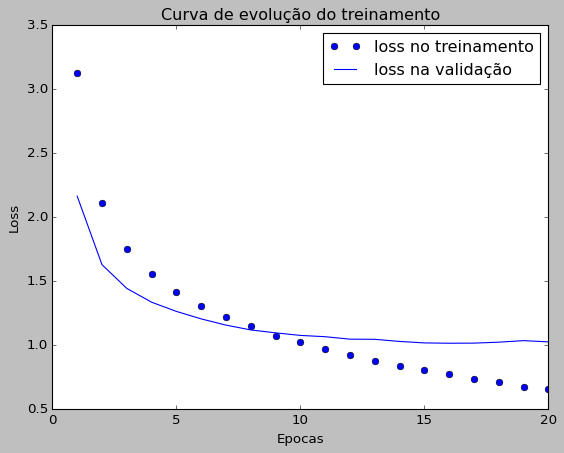

In [35]:
# VALIDATION LOSS curves

plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='loss no treinamento')
plt.plot(epochs, val_loss, 'b', label='loss na validação')
plt.title('Curva de evolução do treinamento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

Validação das curvas de acurácia

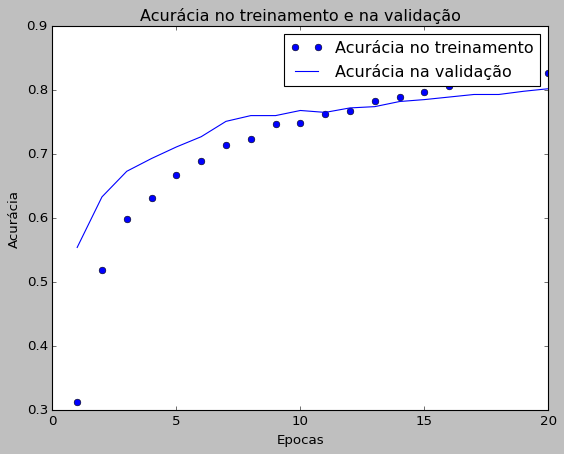

In [38]:

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Acurácia no treinamento')
plt.plot(epochs, val_acc, 'b', label='Acurácia na validação')

plt.title('Acurácia no treinamento e na validação')
plt.xlabel('Epocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()



['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


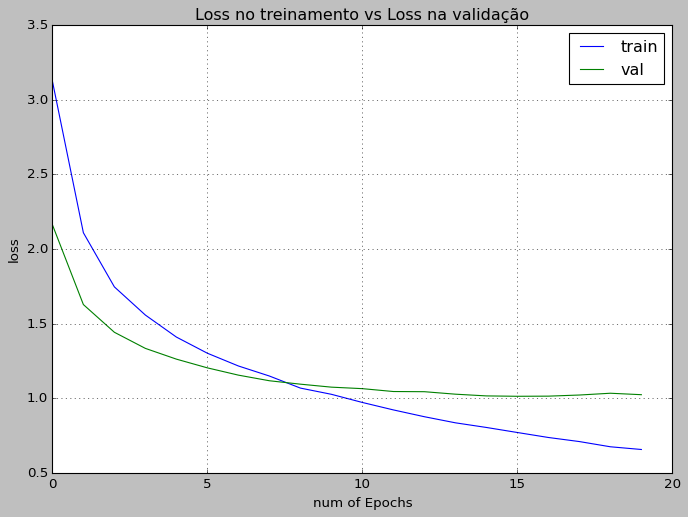

In [39]:

xc=range(NumEpochs)
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(1,figsize=(10,7))
plt.plot(xc,loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('Loss no treinamento vs Loss na validação')
plt.grid(True)
plt.legend(['train','val'])
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

O desempenho do modelo criado foi satisfatório, esse desempenho foi observado  os conjuntos de treino e validação, nas linhas a seguir o modelo vai ser testado no conjunto de teste

In [40]:

predictions = model.predict(x_test)
# Cada entrada nas previsões é um vetor de comprimento 46
print(predictions[123].shape)

# Os coeficientes neste vetor somam 1:
print(np.sum(predictions[123]))

# A maior entrada é a classe prevista — a classe com a maior probabilidade:
print(np.argmax(predictions[123]))

(46,)
1.0000001
4


Obtenção das três melhores classes

In [41]:
predictions[21].argsort()[-3:][::-1]

array([ 3,  4, 16])

In [42]:
test_labels[21]

3

In [43]:
SampleNum = 2125

print(test_labels[SampleNum])
print(predictions[SampleNum].argsort()[-3:][::-1])

test_labels[SampleNum] in predictions[SampleNum].argsort()[-3:][::-1]

6
[ 6  3 23]


True

Criação de uma matriz das três principais classes

In [44]:
Top3Preds = np.zeros((2246,3), dtype=int)
print(Top3Preds.shape)

for SampleNum in range(predictions.shape[0]):
    Top3Preds[SampleNum] = predictions[SampleNum].argsort()[-3:][::-1]
    
Top3Preds

(2246, 3)


array([[ 3,  4, 19],
       [10,  9, 18],
       [ 1, 16,  2],
       ...,
       [ 3,  4, 20],
       [ 3,  4, 16],
       [ 1, 24,  2]])

In [20]:


FinalPreds = np.zeros((2246,1), dtype=int)
print(FinalPreds.shape)

for SampleNum in range(Top3Preds.shape[0]):
    if test_labels[SampleNum] in Top3Preds[SampleNum]:
        FinalPreds[SampleNum] = 1
        
FinalPreds

(2246, 1)


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

Calculo das previsões em 0 e 1 para a matriz de confusão

In [46]:
FinalPreds = pd.DataFrame(FinalPreds)
NumTop3 = FinalPreds[0][FinalPreds[0] == 1].count()
percentTop3 = round(100 *NumTop3 / FinalPreds.shape[0], 1)

print(' O percentual aferido para que um dos três primeiros esteja correto:', percentTop3, '%')

 O percentual aferido para que um dos três primeiros esteja correto: 87.8 %


Conclusões: O percentual aferido de 87,5% demonstra que o modelo de rede neural recorrente obteve um desempenho excelente